In [3]:
# Importing the libraries
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [4]:
# Read CSV train data file into DataFrame
titanic_dataset = pd.read_csv("train.csv")

In [5]:
# preview train data
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print('The number of samples into the train data is {}.'.format(titanic_dataset .shape))

The number of samples into the train data is (891, 12).


In [7]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print('Percent of missing "Age" records is %.2f%%' %((titanic_dataset ['Age'].isnull().sum()/titanic_dataset .shape[0])*100))


Percent of missing "Age" records is 19.87%


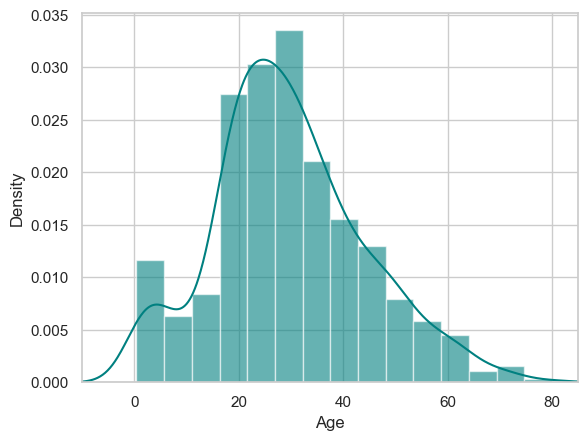

In [9]:
ax = titanic_dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_dataset["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

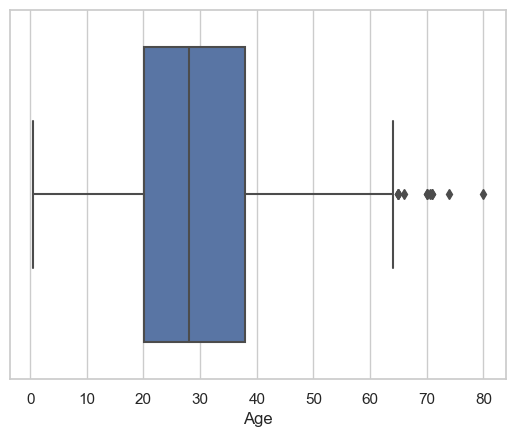

In [10]:
import seaborn as sns
sns.boxplot(x =titanic_dataset["Age"])
plt.show()

In [89]:
# mean age
print('The mean of "Age" is %.2f' %(titanic_dataset["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(titanic_dataset["Age"].median(skipna=True)))


The mean of "Age" is 29.70
The median of "Age" is 28.00


In [11]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((titanic_dataset['Cabin'].isnull().sum()/titanic_dataset.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [14]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((titanic_dataset['Embarked'].isnull().sum()/titanic_dataset.shape[0])*100))

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic_dataset['Embarked'].value_counts())


Percent of missing "Embarked" records is 0.22%
Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [17]:
# example for checking value_counts() from any columns
print(titanic_dataset["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


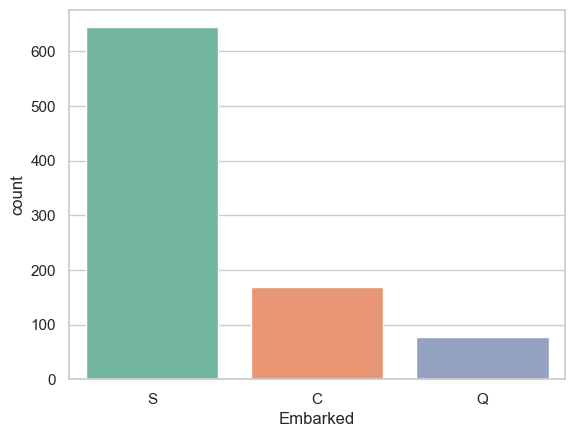

The most common boarding port of embarkation is S.


In [27]:
sns.countplot(x='Embarked', data=titanic_dataset, palette='Set2')
plt.show()

print('The most common boarding port of embarkation is %s.' %titanic_dataset['Embarked'].value_counts().idxmax())

In [32]:
titanic_dataset['Age'].fillna((titanic_dataset['Age'].mean()), inplace=True)
# Remove the other nullvalues
titanic_dataset.dropna(inplace=True)

In [33]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [57]:
sex = pd.get_dummies(titanic_dataset['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_dataset['Embarked'], drop_first=True)


In [58]:
sex

,male
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


In [73]:
embark

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [60]:
titanic_dataset.drop(['Sex','Embarked','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [61]:
titanic_dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch
1,2,1,1,38.0,1,0
3,4,1,1,35.0,1,0
6,7,0,1,54.0,0,0
10,11,1,3,4.0,1,1
11,12,1,1,58.0,0,0
...,...,...,...,...,...,...
871,872,1,1,47.0,1,1
872,873,0,1,33.0,0,0
879,880,1,1,56.0,0,1
887,888,1,1,19.0,0,0


In [65]:
titanic_dataset = pd.concat([titanic_dataset,sex,embark],axis=1)

In [66]:
titanic_dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
1,2,1,1,38.0,1,0,0,0,0
3,4,1,1,35.0,1,0,0,0,1
6,7,0,1,54.0,0,0,1,0,1
10,11,1,3,4.0,1,1,0,0,1
11,12,1,1,58.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,0,0,1
872,873,0,1,33.0,0,0,1,0,1
879,880,1,1,56.0,0,1,0,0,0
887,888,1,1,19.0,0,0,0,0,1


In [67]:
# Splitting the dataset into the Training set and Test set
titanic_data_X = titanic_dataset[['PassengerId','male','Age','SibSp','Parch','Q','S']]
titanic_data_Y = titanic_dataset[['Survived']]


In [69]:
titanic_data_Y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [70]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(titanic_data_X, titanic_data_Y, test_size=0.20)

In [71]:
#Create object of logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()


In [72]:
#Fit the model
logistic_regression.fit(X_train,Y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [78]:
# Predicting the results
Y_pred = logistic_regression.predict(X_test)



In [79]:
Y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [80]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [81]:
cm

array([[12,  5],
       [ 5, 19]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import  precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score

In [84]:
print(" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))

 accuracy is 0.756


In [37]:
#ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).

In [38]:
pred_prob = logistic_regression.predict_proba(X_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC Score: %.2f' % auc)

AUC Score: 0.93


In [39]:
probs

array([0.46541829, 0.93030304, 0.41518467, 0.47388906, 0.22056071,
       0.84270442, 0.9184579 , 0.9094585 , 0.65534988, 0.86991677,
       0.37619559, 0.91084167, 0.93325061, 0.9396856 , 0.47319307,
       0.46301677, 0.86690566, 0.42896053, 0.89069727, 0.9310586 ,
       0.86432822, 0.93370341, 0.41380254, 0.38587753, 0.5278787 ,
       0.91726074, 0.90763931, 0.89734404, 0.85788297, 0.89691318,
       0.42602028, 0.2903734 , 0.51472673, 0.60530804, 0.53035778,
       0.88307049, 0.35713718, 0.89314678, 0.5921276 , 0.92988404,
       0.49933888])

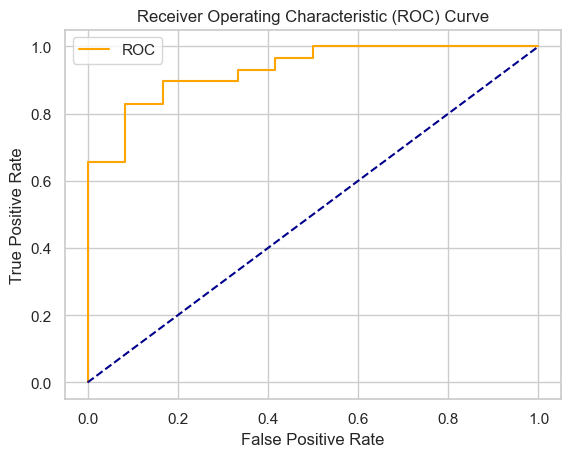

In [40]:
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [41]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.93      0.86      0.89        29

    accuracy                           0.85        41
   macro avg       0.82      0.85      0.83        41
weighted avg       0.86      0.85      0.86        41

